sphere/distribution/distribution.py:595: RuntimeWarning: invalid value encountered in sqrt
  x2 = sgn_0*np.sqrt(-radicalz(x1))/(2*m*x1*b+k*n1)


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


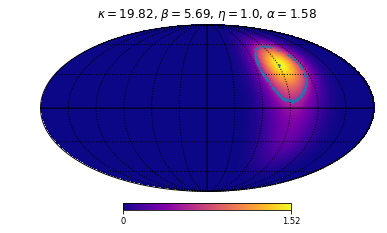

In [1]:
import itertools
import numpy as np
import healpy as hp
import sphere.distribution as sd

from matplotlib import cm
from matplotlib import pyplot as plt
%matplotlib inline


def fb8_map(fb8obj, nside):
    """Returns a map of the fb8 distribution's pdf in the specified
    coordinates                                                                                                                                                                                                                               
    """                                                                                                                                                                                                                                       
    npix = hp.nside2npix(nside)
    zen, azi = hp.pix2ang(nside, np.arange(npix))
    return fb8obj.pdf(fb8obj.spherical_coordinates_to_nu(zen, azi))

def plot_map(theta,phi,psi,kappa,beta,eta,alpha,rho, nside=64):
    pdf = sd.fb8(theta,phi,psi,kappa,beta,eta,alpha,rho)
    kmap = fb8_map(pdf,nside)
    thetas, phis = pdf.contour()
    tmax, phmax = pdf.max()
    vmap = cm.plasma
    vmap.set_under('w')
    vmap.set_bad('w')
    hp.mollview(kmap, title=r'$\kappa={}$, $\beta={}$, $\eta={}$, $\alpha={:.2f}$'.format(kappa,beta,eta,alpha),
                min=0, max=np.round(np.nanmax(kmap),2),
                cmap=vmap,hold=True,cbar=True,xsize=1600)
    hp.graticule()
    hp.projplot(thetas, phis, '.', markersize=2)
    hp.projplot(tmax, phmax, '.', markersize=3)

#plot_map(np.pi/2,0,0,0.1,0.1,-1,0.1,0.)
plot_map(np.pi/2, 0, 0, 19.82, 5.69, 1.00, 1.58, -1.65)

In [ ]:
etas = [-1,-0.8,1]
alphas = [0,np.pi/4, np.pi/2]
betas = [1,5,10]
kappas = [1,5,10]

curr_kappa = 0
curr_ax = 0
for kappa, beta, eta, alpha in itertools.product(kappas, betas, etas, alphas):
    if kappa != curr_kappa:
        if curr_ax:
            plt.savefig('fig/k{}.png'.format(curr_kappa),bbox_inches='tight')
        fig, axes = plt.subplots(len(betas)*len(etas), len(alphas), figsize=(7*len(alphas),5*len(betas)*len(etas)), dpi=300)
        flat_axes = axes.flatten()
        curr_kappa = kappa
        curr_ax = 0
    plt.sca(flat_axes[curr_ax])
    plot_map(np.pi/2,0,0,kappa,beta,eta,alpha,0)
    curr_ax+=1
plt.savefig('fig/k{}.png'.format(kappa),bbox_inches='tight')

In [ ]:
for k, b, m in itertools.product(np.arange(0.1,41, 20),
                                 np.arange(0.1,41, 20),
                                 np.arange(-1, 1, 0.4)):
    nquad = sd.fb8(np.pi/2,0,0,k,b,m,1e-12,0.).normalize()
    nsum = sd.fb8(np.pi/2,0,0,k,b,m,0,0.).normalize()
    if (nquad-nsum)/nquad > 0.01:
        print k, b, m
        print nquad, nsum